## Hello so here i have used Tensorflow framework to showcase my simple recurrent neural network project


In [3]:
!pip install tensorflow scikit-learn pandas matplotlib seaborn plotly nltk

In [8]:
import warnings
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

warnings.filterwarnings("ignore")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [7]:
!pip install charset-normalizer==2.1.1

  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.4.1
    Uninstalling charset-normalizer-3.4.1:
      Successfully uninstalled charset-normalizer-3.4.1


In [10]:
data = pd.read_csv("/content/Clothing-Review.csv")
data.head(7)
print(data.shape)

data = data[data['Class Name'].isnull() == False]


(23486, 10)


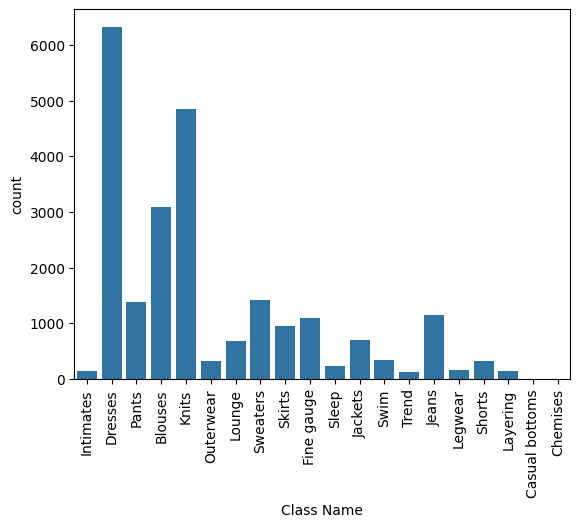

In [11]:
sns.countplot(data=data, x='Class Name')
plt.xticks(rotation=90)
plt.show()

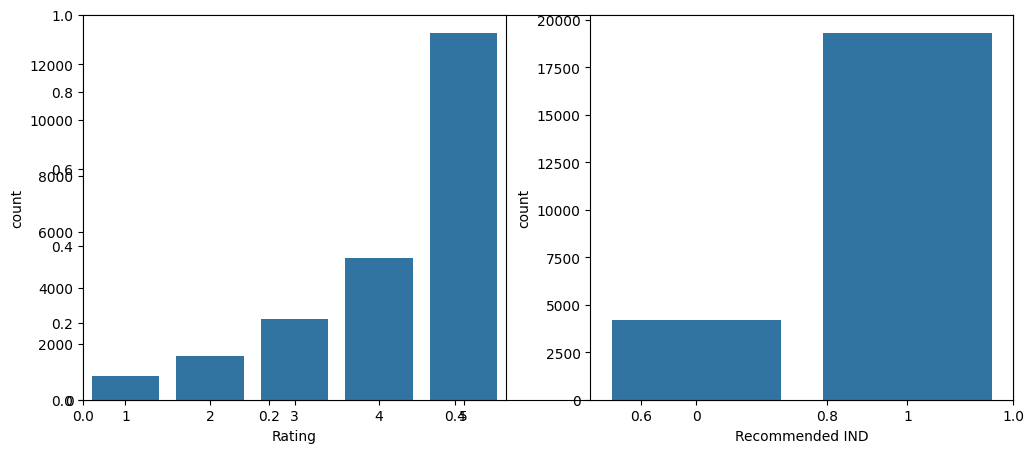

In [12]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Rating')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x="Recommended IND")
plt.show()


In [13]:
# histogram is amount of frequency
fig = px.histogram(data, marginal='box',
                   x="Age", title="Age Group",
                   color="Recommended IND",
                   nbins=65-18,
                   color_discrete_sequence=['green', 'red'])
fig.update_layout(bargap=0.2)


In [14]:
fig = px.histogram(data,
                   x="Age",
                   marginal='box',
                   title="Age Group",
                   color="Rating",
                   nbins=65-18,
                   color_discrete_sequence\
                   =['black', 'green', 'blue', 'red', 'yellow'])
fig.update_layout(bargap=0.2)


In [16]:
def filter_score(rating):
    return int(rating > 3)

features = ['Class Name', 'Title', 'Review Text']

X = data[features]
y = data['Rating']
y = y.apply(filter_score)


In [17]:
def toLower(data):
    if isinstance(data, float):
        return '<UNK>'
    else:
        return data.lower()

stop_words = stopwords.words("english")

def remove_stopwords(text):
    no_stop = []
    for word in text.split(' '):
        if word not in stop_words:
            no_stop.append(word)
    return " ".join(no_stop)

def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

X['Title'] = X['Title'].apply(toLower)
X['Review Text'] = X['Review Text'].apply(toLower)

X['Title'] = X['Title'].apply(remove_stopwords)
X['Review Text'] = X['Review Text'].apply(remove_stopwords)

X['Title'] = X['Title'].apply(lambda x: lemm.lemmatize(x))
X['Review Text'] = X['Review Text'].apply(lambda x: lemm.lemmatize(x))

X['Title'] = X['Title'].apply(remove_punctuation_func)
X['Review Text'] = X['Review Text'].apply(remove_punctuation_func)

X['Text'] = list(X['Title']+X['Review Text']+X['Class Name'])


X_train, X_test, y_train, y_test = train_test_split(
    X['Text'], y, test_size=0.25, random_state=42)


In [18]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)


In [19]:
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

train_pad = pad_sequences(train_seq,
                          maxlen=40,
                          truncating="post",
                          padding="post")
test_pad = pad_sequences(test_seq,
                         maxlen=40,
                         truncating="post",
                         padding="post")


In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(10000, 128))
model.add(keras.layers.SimpleRNN(64, return_sequences=True))
model.add(keras.layers.SimpleRNN(64))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile("rmsprop",
              "binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_pad,
                    y_train,
                    epochs=5)


Epoch 1/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7658 - loss: 0.5342
Epoch 2/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8312 - loss: 0.3945
Epoch 3/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8773 - loss: 0.3086
Epoch 4/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9022 - loss: 0.2601
Epoch 5/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9210 - loss: 0.2156
